In [1]:
%cd ..

C:\Users\nordo\Documents\GitHub\LazyDSGenerator


# LazyDSGenerator 
## Example of how to use it.

Here we are going to use the Videogames Sales Dataset whose description can be found in https://www.kaggle.com/datasets/gregorut/videogamesales

We load the CSV file from this github repo https://github.com/ValdisW/datasets/blob/master/video-game-sales.csv

In [2]:
import pandas as pd
from lazydsgen.lazydsgen import LazyDSGenerator

In [3]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/ValdisW/datasets/master/video-game-sales.csv", index_col = "Rank")
desc= """
The data is a dataframe with the following dataset:
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com. Fields include:
    Rank - Ranking of overall sales
    Name - The games name
    Platform - Platform of the games release (i.e. PC,PS4, etc.)
    Year - Year of the game's release (float)
    Genre - Genre of the game
    Publisher - Publisher of the game
    NA_Sales - Sales in North America (in millions)
    EU_Sales - Sales in Europe (in millions)
    JP_Sales - Sales in Japan (in millions)
    Other_Sales - Sales in the rest of the world (in millions)
    Global_Sales - Total worldwide sales.
"""

We need to load the credentials from OpenAI (stored in a.env file, and should be named 'OPENAI_API_KEY')

In [4]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

It is more recomended the GPT4 version as its performance is better than GPT3.5 (maybe for the most simple examples it is fine).

In [5]:
agi_vg = LazyDSGenerator(dataframe,desc, model_name="gpt-4")

D:\anaconda3\envs\genai\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


D:\anaconda3\envs\genai\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `predict` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


```python
import pandas as pd
import matplotlib.pyplot as plt

def fun_generated(data):
    mario_kart_data = data[data['Name'].str.contains('Mario Kart', case=False, na=False)]
    mario_kart_data = mario_kart_data.sort_values('JP_Sales', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(mario_kart_data['Name'], mario_kart_data['JP_Sales'], color='blue')
    plt.xlabel('Sales in Japan (in millions)')
    plt.ylabel('Game Name')
    plt.title('Mario Kart Sales in Japan')
    plt.gca().invert_yaxis()
    plt.show()
```


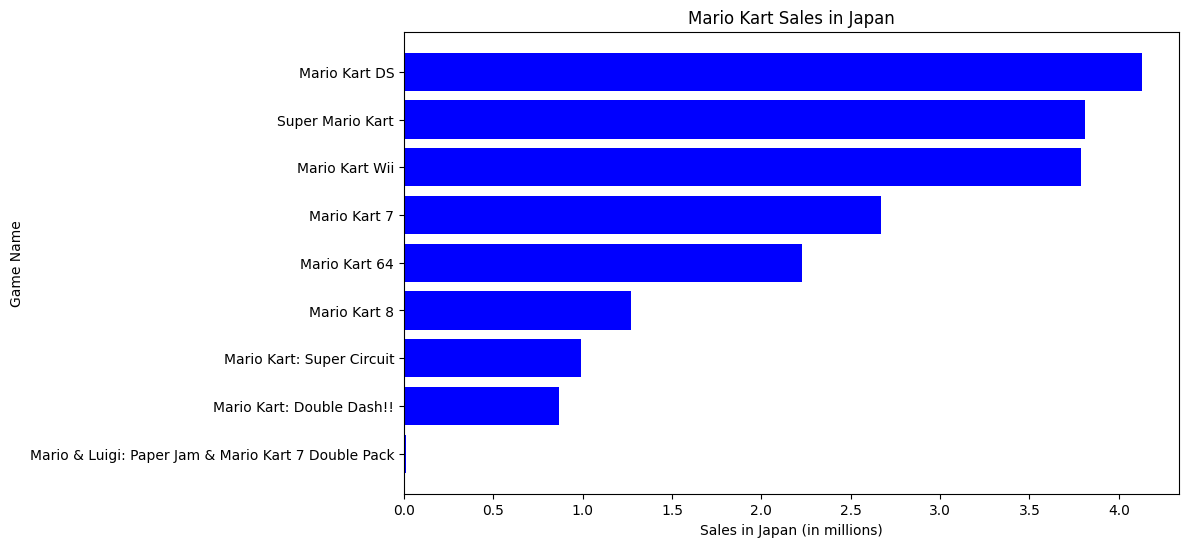

{'result': None,
 'code': "```python\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\ndef fun_generated(data):\n    mario_kart_data = data[data['Name'].str.contains('Mario Kart', case=False, na=False)]\n    mario_kart_data = mario_kart_data.sort_values('JP_Sales', ascending=False)\n    \n    plt.figure(figsize=(10, 6))\n    plt.barh(mario_kart_data['Name'], mario_kart_data['JP_Sales'], color='blue')\n    plt.xlabel('Sales in Japan (in millions)')\n    plt.ylabel('Game Name')\n    plt.title('Mario Kart Sales in Japan')\n    plt.gca().invert_yaxis()\n    plt.show()\n```",
 'input': '\nMake a barplot with the mario kart sales in japan.\n',
 'prompt': "The user has asked the following question: \n\nMake a barplot with the mario kart sales in japan.\n\n\nDESCRIPTION OF THE DATA:\n\nThe data is a dataframe with the following dataset:\nThis dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com. Fields include:\n    

In [6]:
q =  """
Make a barplot with the mario kart sales in japan.
"""

agi_vg.invoke(q, verbose = True)

In [7]:
q2 = """Make a K-means clustering model on all the sales data using k = 7 clusters. Ignore NaN rows.
Return a dataframe with the labels and the rest of the data."""
rr = agi_vg.invoke(q2, verbose=True)

```python
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

def fun_generated(data):
    data = data.dropna()
    le = LabelEncoder()
    data['Name'] = le.fit_transform(data['Name'])
    data['Platform'] = le.fit_transform(data['Platform'])
    data['Genre'] = le.fit_transform(data['Genre'])
    data['Publisher'] = le.fit_transform(data['Publisher'])
    kmeans = KMeans(n_clusters=7)
    data['labels'] = kmeans.fit_predict(data)
    return data
```


C:\Users\nordo\Documents\GitHub\LazyDSGenerator\generated.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Name'] = le.fit_transform(data['Name'])
C:\Users\nordo\Documents\GitHub\LazyDSGenerator\generated.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Platform'] = le.fit_transform(data['Platform'])
C:\Users\nordo\Documents\GitHub\LazyDSGenerator\generated.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [8]:
rr["result"].sample(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,labels
Rank,,,,,,,,,,,
4577,5039,17,2009.0,3,547,0.24,0.13,0.0,0.06,0.42,6
15097,2077,13,2007.0,6,91,0.00,0.02,0.0,0.00,0.02,1
6916,8338,16,2004.0,7,325,0.12,0.09,0.0,0.03,0.24,4
8111,667,6,2001.0,1,524,0.13,0.05,0.0,0.00,0.18,5
7364,6420,29,2005.0,10,493,0.16,0.05,0.0,0.01,0.21,0
